In [1]:
from mnist import MNIST
import os
import numpy as np

mndata = MNIST('mnist')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()



In [2]:
np.shape(X_train)

(60000, 784)

In [4]:
np.shape(y_train)

(60000,)

In [5]:
np.shape(X_test)

(10000, 784)

In [6]:
np.shape(y_test)

(10000,)

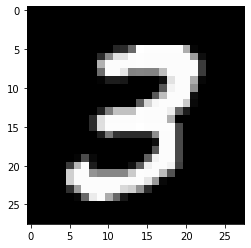

3


In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

id = 7

image = np.array(X_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])

In [8]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


## Optimizer evaluation 

In [11]:

# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.optimizers import SGD



# Function to create model, required for KerasClassifier
def create_model(optimizer):
    # create model
    model = Sequential()
    model.add(Dense(32, input_shape=(784,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Tune with 10 different sub_training and validation sets.
n = 10
for i in range(0, n):
    
    # (b) Split the training dataset into sub training and validation sets randomly. 
    # Use 1/6 th of training dataset as validation set
    
    X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, test_size=0.16)

    # convert to one-hot vector
    y_sub_train = to_categorical(y_sub_train)
    y_val = to_categorical(y_val)
    
    X_sub_train = np.asarray(X_sub_train)
    y_sub_train = np.asarray(y_sub_train)
    X_val = np.asarray(X_val)
    y_val = np.asarray(y_val)

    
    split_index = [-1]*len(X_sub_train) + [0]*len(X_val)
    X = np.concatenate((X_sub_train, X_val), axis=0)
    y = np.concatenate((y_sub_train, y_val), axis=0)
    pds = PredefinedSplit(test_fold = split_index)



    # define the grid search parameters
    # Tune hyper-parameters of SGD, RMSprop, Adam, and Adagrad.
    batch_size = [20, 60, 100]
    epochs = [10, 50, 100]
    optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad']
    param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=pds)
    grid_result = grid.fit(X, y)


    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.985823 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adam'}
0.915052 (0.000000) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
0.926177 (0.000000) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'RMSprop'}
0.977479 (0.000000) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adam'}
0.957583 (0.000000) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adagrad'}
0.937896 (0.000000) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'SGD'}
0.973979 (0.000000) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'RMSprop'}
0.912208 (0.000000) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adam'}
0.959990 (0.000000) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adagrad'}
0.922032 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'SGD'}
0.962730 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'RMSprop'}
0.985823 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adam'}
0.969719 (0.000000) with: {'b

### The best hyper-parameters found above - Best: 0.985823 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adam'}

### Test Accuracy with the best hyper-parameters - 0.9788

In [8]:
# train the network with the training dataset
from mnist import MNIST
import os
import numpy as np
from keras.utils import to_categorical, plot_model


mndata = MNIST('mnist')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 3s - loss: 0.4481 - accuracy: 0.9282
Epoch 2/100
 - 3s - loss: 0.1171 - accuracy: 0.9573
Epoch 3/100
 - 2s - loss: 0.0831 - accuracy: 0.9738
Epoch 4/100
 - 3s - loss: 0.0741 - accuracy: 0.9771
Epoch 5/100
 - 3s - loss: 0.0714 - accuracy: 0.9781
Epoch 6/100
 - 2s - loss: 0.0693 - accuracy: 0.9787
Epoch 7/100
 - 3s - loss: 0.0695 - accuracy: 0.9788
Epoch 8/100
 - 3s - loss: 0.0682 - accuracy: 0.9791
Epoch 9/100
 - 3s - loss: 0.0676 - accuracy: 0.9794
Epoch 10/100
 - 2s - loss: 0.0675 - accuracy

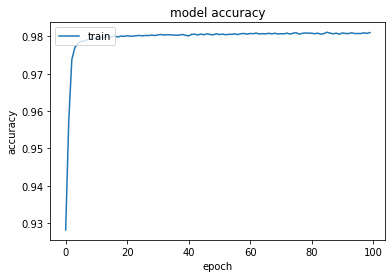

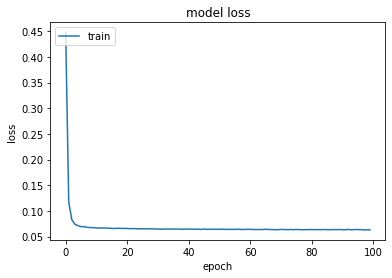

In [11]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(32, input_shape=(784,), activation="relu"))
model.add(Dense(10,activation="sigmoid" ))

model.summary()

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=20, epochs=100,
          verbose=2)

score = model.evaluate(X_test, y_test,verbose=1)
print("Test Accuracy with the best hyper-parameters:", score)

history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Architecture evaluation

In [12]:
# train the network with the training dataset
from mnist import MNIST
import os
import numpy as np
from keras.utils import to_categorical, plot_model


mndata = MNIST('mnist')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

In [13]:
# Use scikit-learn to grid search the activation function and number of units
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.optimizers import SGD



# Function to create model, required for KerasClassifier
def create_model(activation, units):
    # create model
    model = Sequential()
    model.add(Dense(units, input_shape=(784,), activation=activation))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Tune with sub_training and validation sets.
n = 10
for i in range(0, n):
    
    X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.16)

    # convert to one-hot vector
    y_sub_train = to_categorical(y_sub_train)
    y_val = to_categorical(y_val)
    
    X_sub_train = np.asarray(X_sub_train)
    y_sub_train = np.asarray(y_sub_train)
    X_val = np.asarray(X_val)
    y_val = np.asarray(y_val)

    
    split_index = [-1]*len(X_sub_train) + [0]*len(X_val)
    X = np.concatenate((X_sub_train, X_val), axis=0)
    y = np.concatenate((y_sub_train, y_val), axis=0)
    pds = PredefinedSplit(test_fold = split_index)



    # define the grid search parameters
    batch_size = [20]
    epochs = [100]
    # find the best architecture in terms of the number of units, and activation functions
    activation = ['softmax', 'relu', 'tanh', 'sigmoid']
    units = [5, 20, 30]
    param_grid = dict(batch_size=batch_size, epochs=epochs, activation=activation, units=units)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=pds)
    grid_result = grid.fit(X, y)


    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.985719 using {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'units': 30}
0.909563 (0.000000) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 100, 'units': 5}
0.900000 (0.000000) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 100, 'units': 20}
0.924229 (0.000000) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 100, 'units': 30}
0.900000 (0.000000) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'units': 5}
0.960062 (0.000000) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'units': 20}
0.985719 (0.000000) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'units': 30}
0.907918 (0.000000) with: {'activation': 'tanh', 'batch_size': 20, 'epochs': 100, 'units': 5}
0.976490 (0.000000) with: {'activation': 'tanh', 'batch_size': 20, 'epochs': 100, 'units': 20}
0.982573 (0.000000) with: {'activation': 'tanh', 'batch_size': 20, 'epochs': 100, 'units': 30}
0.951614 (0.000000) with: {'activation': 'sigmoid

### Best architecture in terms of the number of units and activation functions from above is - Best: 0.985719 using {'activation': 'relu', 'batch_size': 20, 'epochs': 100, 'units_1': 30, 'units_2':30}


In [14]:
# train the network with the training dataset
from mnist import MNIST
import os
import numpy as np
from keras.utils import to_categorical, plot_model


mndata = MNIST('mnist')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

In [16]:
# Use scikit-learn to grid search the number of layers
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from keras.optimizers import SGD



# Function to create model, required for KerasClassifier
def create_model(units_1, units_2):
    # create model
    model = Sequential()
    model.add(Dense(units_1, input_shape=(784,), activation='relu'))
    model.add(Dense(units_2, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Tune with sub_training and validation sets.
n = 10
for i in range(0, n):
    
    X_sub_train, X_val, y_sub_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.16)

    # convert to one-hot vector
    y_sub_train = to_categorical(y_sub_train)
    y_val = to_categorical(y_val)
    
    X_sub_train = np.asarray(X_sub_train)
    y_sub_train = np.asarray(y_sub_train)
    X_val = np.asarray(X_val)
    y_val = np.asarray(y_val)

    
    split_index = [-1]*len(X_sub_train) + [0]*len(X_val)
    X = np.concatenate((X_sub_train, X_val), axis=0)
    y = np.concatenate((y_sub_train, y_val), axis=0)
    pds = PredefinedSplit(test_fold = split_index)



    # define the grid search parameters
    batch_size = [20]
    epochs = [100]
    # find the best architecture in terms ofthe number of layers
    units_1 = [5, 20, 30]
    units_2 = [5, 20, 30]
    param_grid = dict(batch_size=batch_size, epochs=epochs, units_1=units_1, units_2=units_2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=pds)
    grid_result = grid.fit(X, y)


    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987854 using {'batch_size': 20, 'epochs': 100, 'units_1': 30, 'units_2': 30}
0.900000 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 5, 'units_2': 5}
0.899958 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 5, 'units_2': 20}
0.910125 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 5, 'units_2': 30}
0.900000 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 20, 'units_2': 5}
0.935906 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 20, 'units_2': 20}
0.980968 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 20, 'units_2': 30}
0.973385 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 30, 'units_2': 5}
0.983729 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 30, 'units_2': 20}
0.987854 (0.000000) with: {'batch_size': 20, 'epochs': 100, 'units_1': 30, 'units_2': 30}


### Report 3 best architecture in terms of the Test accuracy


#### 1. The first best architecture with Test Accuracy of "98.98%" has 2 hidden layers with 30 units for both of them. The first hidden layer using "reLU" and second hidden layer using "Sigmoid" activation functions with 100 epochs and 20 batch_size using "Adam" as optimizer.
#### 2. The second best architecture with Test Accuracy of "98.74%" has 2 hidden layers with 30 units for both of them. The first hidden layer using "Sigmoid" and second hidden layer using "Sigmoid" activation functions with 100 epochs and 20 batch_size using "Adam" as optimizer.
#### 3. The first best architecture with Test Accuracy of "98.26%" has 2 hidden layers with 30 units for both of them. The first hidden layer using "reLU" and second hidden layer using "reLu" activation functions with 100 epochs and 20 batch_size using "Adam" as optimizer.

#### All of these hyper-parameters are tuned first by using the sub_training and validation sets and the test set is used to get the Test accuracies.

#### These 3 architectures are executed below.

In [17]:
# train the network with the training dataset
from mnist import MNIST
import os
import numpy as np
from keras.utils import to_categorical, plot_model


mndata = MNIST('mnist')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_20 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 3s - loss: 0.2851 - accuracy: 0.9283
Epoch 2/100
 - 3s - loss: 0.1098 - accuracy: 0.9591
Epoch 3/100
 - 3s - loss: 0.0939 - accuracy: 0.9646
Epoch 4/100
 - 3s - loss: 0.0855 - accuracy: 0.9686
Epoch 5/100
 - 3s - loss: 0.0764 - accuracy: 0.9750
Epoch 6/100
 - 3s - loss: 0.0704 - accuracy: 0.9780
Epoch 7/100
 - 3s - loss: 0.0666 - accuracy: 0.9790
Epoch 8/100
 - 

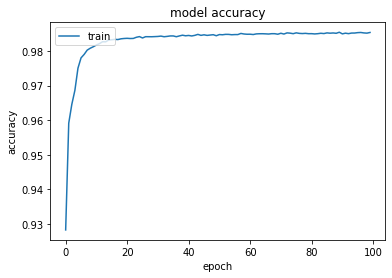

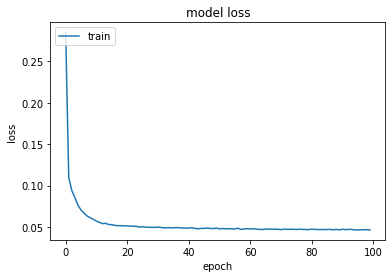

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(30, input_shape=(784,), activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(10,activation="sigmoid" ))

model.summary()

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=20, epochs=100,
          verbose=2)

score = model.evaluate(X_test, y_test,verbose=1)
print("Test Accuracy with the best hyper-parameters:", score)

history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_23 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 3s - loss: 0.1992 - accuracy: 0.9278
Epoch 2/100
 - 3s - loss: 0.1029 - accuracy: 0.9655
Epoch 3/100
 - 3s - loss: 0.0862 - accuracy: 0.9712
Epoch 4/100
 - 3s - loss: 0.0763 - accuracy: 0.9746
Epoch 5/100
 - 4s - loss: 0.0742 - accuracy: 0.9755
Epoch 6/100
 - 3s - loss: 0.0700 - accuracy: 0.9770
Epoch 7/100
 - 3s - loss: 0.0639 - accuracy: 0.9788
Epoch 8/100
 - 

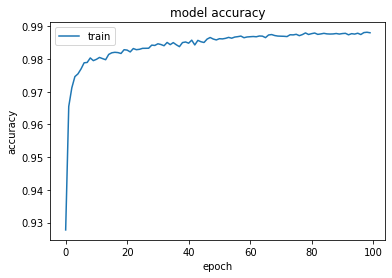

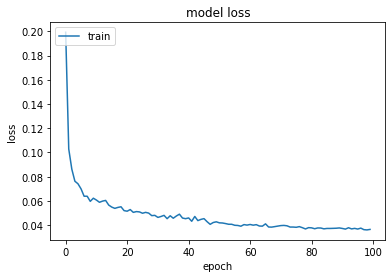

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(30, input_shape=(784,), activation="sigmoid"))
model.add(Dense(30, activation="sigmoid"))
model.add(Dense(10,activation="sigmoid" ))

model.summary()

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=20, epochs=100,
          verbose=2)

score = model.evaluate(X_test, y_test,verbose=1)
print("Test Accuracy with the best hyper-parameters:", score)

history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 3s - loss: 0.1521 - accuracy: 0.9477
Epoch 2/100
 - 3s - loss: 0.0693 - accuracy: 0.9787
Epoch 3/100
 - 3s - loss: 0.0597 - accuracy: 0.9811
Epoch 4/100
 - 3s - loss: 0.0552 - accuracy: 0.9827
Epoch 5/100
 - 3s - loss: 0.0521 - accuracy: 0.9836
Epoch 6/100
 - 3s - loss: 0.0518 - accuracy: 0.9835
Epoch 7/100
 - 3s - loss: 0.0491 - accuracy: 0.9843
Epoch 8/100
 - 

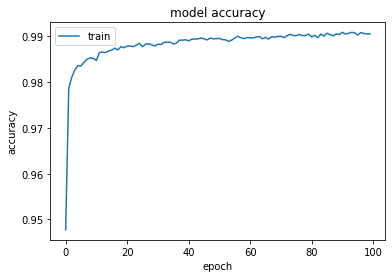

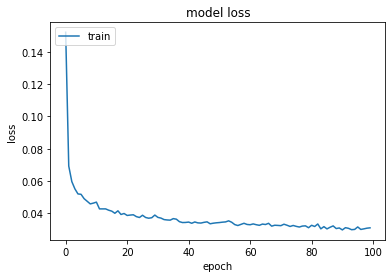

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(30, input_shape=(784,), activation="relu"))
model.add(Dense(30, activation="sigmoid"))
model.add(Dense(10,activation="sigmoid" ))

model.summary()

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=20, epochs=100,
          verbose=2)

score = model.evaluate(X_test, y_test,verbose=1)
print("Test Accuracy with the best hyper-parameters:", score)

history_dict = history.history
print(history_dict.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
